## **Tugas Besar Pengganti Ujian Tengah Semester (UTS), Semester Genap 2023/2024**
### Deadline: 1 Mei 2024, Pukul 5 Sore
##### Dosen: DKT, ITQ, HUE


---
***'Dengan ini kami menyatakan bahwa tugas ini dibuat sebenar-benarnya hasil kerjasama kami dalam kelompok. Kami menjunjung tinggi aspek kejujuran sehingga kami dapat pastikan hasil ini bukan berasal dari meniru/mencontek/meminta hasil/berdiskusi dengan kelompok lain, baik dalam satu kelas yang sama maupun berbeda'***

---
Bandung, 24 April 2024

> Kelompok: 11
>
> Anggota:
> 1. Ananda Rafi Amanullah, 1102213017 [25% bagian A]
> 2. Daffa Sahrul Rahman  , 1102210224 [25% bagian B]
> 3. Ghanendra Amru Kumara, 1102213207 [25% bagian B]
> 4. Muhammad Ibrahim, 1102213157 [25% bagian A]

### **Penjelasan (harus dibaca dan dimengerti)**:
* Tugas besar harus dikerjakan menggunakan bahasa pemrograman `Python` dan *library* `Scikit-Learn`. Sebagai dasar, lihat **A.2. Dasar-dasar *Applications Programming Interface* (API) dari *Scikit-Learn*** pada **Chapter 3**
* Pada setiap bagian jawaban, anda bisa menambahkan cell `code` untuk kode maupun cell `Markdown` untuk penjelasan, sesuai dengan kebutuhan masing-masing.
* Dikumpulkan sesuai dengan tenggat waktu, setiap keterlambatan akan diberikan hukuman pengurangan 10 poin setiap kelipatan 15 menit.
* Dikerjakan dengan `Jupyter Lab` atau `Jupyter Notebook`, dan dikumpulkan dalam bentuk file dengan extension `.ipynb` yang digunakan pada `Jupyter Notebook/Jupyter Lab` (tidak boleh dalam format lain)

# 1. Metode Regresi (40 %)

Generate dataset sintentik sesuai dengan nomer kelompok ganjil dan genap dan mengubah "variable_dataset" sesuai dengan jumlah nim akhir dari setiap anggota, misalkan nim anggota 11590012, 115090009, 115090009, jadi variable_dataset adalah 2+9+9 = 20:


1. Kelompok Ganjil 

In [14]:
import numpy as np
n_samples = 500
variable_dataset = 25 #Ubah sesuai ketentuan diatas
rng = np.random.RandomState(0)
X = rng.randn(n_samples, 3)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = 5 * X[:, 0] + np.sin(variable_dataset * np.pi * X[:, 0]) - noise

2. Kelompok Genap 

In [11]:
from sklearn.datasets import make_regression

variable_dataset = 20 #Ubah sesuai ketentuan diatas
X, y = make_regression(n_samples=500, n_features=3, noise=variable_dataset, random_state=100)

Pada soal ini langkah pekerjaan difokuskan untuk mencari fitur mana yang paling berpengaruh untuk memprediksi **output(y)** dengan menggunakan 3 metode regresi.

Training data satu fitur satu persatu dengan menggunakan 3 metode regresi:
1. Regressi Linier
2. Regressi Polinomial
3. Regressi Dicision Tree 

Lakukan training untuk dengan 3 metode itu berulang kali dengan mencari hyperparameter terbaiknya masing-masing metode. Seperti penjelasan dibawah ini:
1. Regressi Linier dengan hyperparameter learning rate (alpa) dan fit_intercept.
2. Regressi Polinomial dengan hyperparameter orde, learning rate (alpa) dan fit_intercept.
3. Regressi Dicision Tree dengan hyperparameter max_dept dan criteria impurity.

Berikut poin-poin penilaian untuk soal:
1. Implementasi code untuk process training benar `(40%)`.
2. Process perncarian hyperparameter yang tepat untuk setiap metode`(10%)`.
3. Penentuan fitur terbaik, hyperparameter terbaik, model/metode terbaik bedasarkan hasil model setiap process training dengan melihat ukuran kinerja regresi MSE,RMSE, R2 (score model regresi)`(30%)`.
4. Analisis fitur terbaik, hyperparameter terbaik, model/metode terbaik yang dilakukan`(10%) `.

## Langkah Pengerjaan

### A. Load Libraries

In [15]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### B. Load Data

In [16]:
# Load dataset sesuai ketentuan diatas
# Perhatikan data kelompok. Data menyesuaikan dengan dengan nomor kelompok
# generate dataset sesuai code diatas.

##contoh
#import library
import numpy as np
#mendefinisikan paramter untuk datasetnya
n_samples = 500
variable_dataset = 25 #Ubah sesuai ketentuan diatas [7+4+7+7]
rng = np.random.RandomState(0)
#membangkitkan dataset
X = rng.randn(n_samples, 3)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = 5 * X[:, 0] + np.sin(variable_dataset * np.pi * X[:, 0]) - noise



### C. Buat 3 plot dengan fitur satu, fitur dua dan fitur 3.

##### Contoh fitur 1

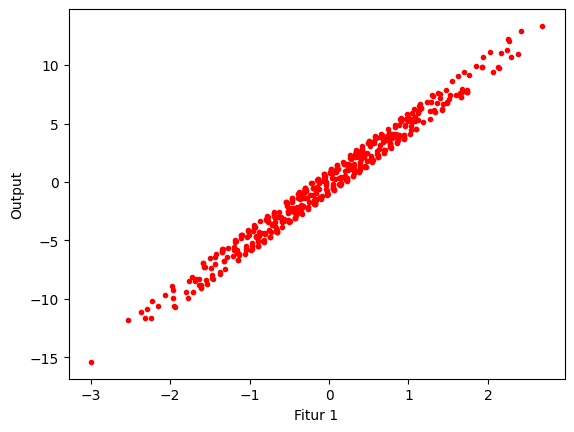

In [17]:
X_feature_satu = X[:,:1] #ambil kolom pertama
plt.xlabel("Fitur 1")
plt.ylabel("Output")
plt.plot(X_feature_satu, y, "r.")

##### Plot fitur 2

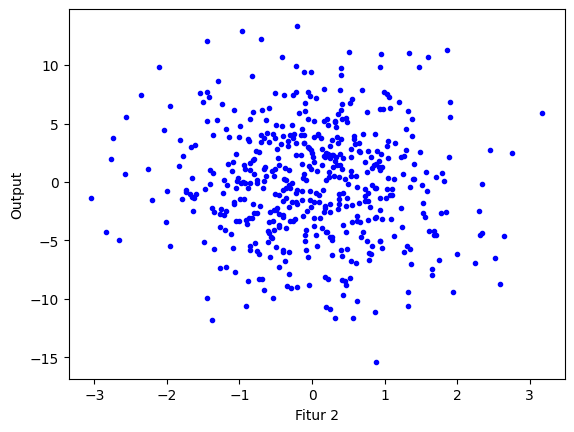

In [18]:
X_feature_dua = X[:,1:2] #ambil kolom kedua
plt.xlabel("Fitur 2")
plt.ylabel("Output")
plt.plot(X_feature_dua, y, "b.")

##### Plot fitur 3

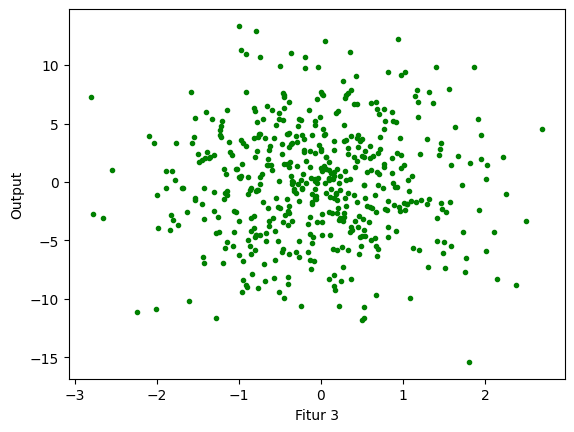

In [19]:
X_feature_tiga = X[:,2:3] #ambil kolom ketiga
plt.xlabel("Fitur 3")
plt.ylabel("Output")
plt.plot(X_feature_tiga, y, "g.")

### D. Pemilihan Fitur Terbaik dengan 3 model Regresi.


Q1. process training dengan **fitur 1 dan output** 

In [20]:
X_feature_satu = X[:,:1] #ambil kolom pertama

In [21]:
#Regresi Linier
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.linear_model import LinearRegression #regresi linier
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_satu" dan output 
X_feature_satu = X[:,:1]
y = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_satu, y, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk menyimpan hasil evaluasi kinerja setiap model
mse_scores = [] #mean squared error
rmse_scores = [] #root mean squared error
r2_scores = [] #r-squared

# Hyperparameter yang akan dieksplorasi
learning_rates= [0.001, 0.01, 0.1]
fit_intercepts = [True, False]

#mencoba looping
for lr in learning_rates:
    for intercept in fit_intercepts:
        model = LinearRegression(fit_intercept=intercept)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        try:
            r2 = r2_score(y_test, y_pred)
        except UndefinedMetricWarning as e: # type: ignore
            msg = "R^2 score is not well-defined with less than two samples."
            warnings.warn(msg, UndefinedMetricWarning) # type: ignore
            r2 = float("nan")
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        
        print(f"Learning Rate: {lr}, Fit Intercept: {intercept}")
        print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
        print("---------------------------------------------------")

#ukur kinerja setiap model pada setiap trainig dengan MSE,RMSE, R2.
best_model_index = np.argmax(r2_scores)

# Mendapatkan hyperparameter dari model terbaik
best_lr_index = best_model_index // len(fit_intercepts)
best_intercept_index = best_model_index % len(fit_intercepts)
best_lr = learning_rates[best_lr_index]
best_intercept = fit_intercepts[best_intercept_index]

# Menampilkan model terbaik
print("Model Terbaik:")
print(f"Learning Rate: {best_lr}, Fit Intercept: {best_intercept}")
print(f"MSE: {mse_scores[best_model_index]}, RMSE: {rmse_scores[best_model_index]}, R2 Score: {r2_scores[best_model_index]}")



Learning Rate: 0.001, Fit Intercept: True
MSE: 0.4672159395984679, RMSE: 0.6835319594565187, R2 Score: 0.9811388106930359
---------------------------------------------------
Learning Rate: 0.001, Fit Intercept: False
MSE: 0.46898780223540293, RMSE: 0.6848268410594045, R2 Score: 0.9810672818050235
---------------------------------------------------
Learning Rate: 0.01, Fit Intercept: True
MSE: 0.4672159395984679, RMSE: 0.6835319594565187, R2 Score: 0.9811388106930359
---------------------------------------------------
Learning Rate: 0.01, Fit Intercept: False
MSE: 0.46898780223540293, RMSE: 0.6848268410594045, R2 Score: 0.9810672818050235
---------------------------------------------------
Learning Rate: 0.1, Fit Intercept: True
MSE: 0.4672159395984679, RMSE: 0.6835319594565187, R2 Score: 0.9811388106930359
---------------------------------------------------
Learning Rate: 0.1, Fit Intercept: False
MSE: 0.46898780223540293, RMSE: 0.6848268410594045, R2 Score: 0.9810672818050235
--------

In [23]:
#Regresi Polinomial
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_satu" dan output 
X_feature_satu = X[:,:1]
y = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_satu, y, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk evaluasi metrik
best_model_index = None
best_mse = np.inf
best_rmse = np.inf
best_r2 = -np.inf

# Hyperparameter yang akan dieksplorasi
ordes = range(1,6) #experiment
learning_rates= [0.001, 0.01, 0.1] #experiment
fit_intercepts = [True, False]

#mencoba looping
for order in ordes:
    for lr in learning_rates:
        for fit_intercept in fit_intercepts:
            # membuat polynomial features transformer
            poly = PolynomialFeatures(degree=order)

            # fitur transform (membuat polynomial terms)
            X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
            X_test_poly = poly.transform(X_test.reshape(-1, 1))

            # membuat model linear regression
            model = LinearRegression(fit_intercept=fit_intercept)
            model.fit(X_train_poly, y_train)

            # Prediksi
            y_pred = model.predict(X_test_poly)

            # evaluasi
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            # Hasil
            print(f"Orde: {order}, Learning Rate: {lr}, Fit Intercept: {fit_intercept}")
            print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
            print("---------------------------------------------------")

            # Update model terbaik berdasarkan nilai R2
            if r2 > best_r2:
                best_model_index = (order, lr, fit_intercept)
                best_mse = mse
                best_rmse = rmse
                best_r2 = r2

# Detail hasil model terbaik
print("Best Model:")
print(f"Orde: {best_model_index[0]}, Learning Rate: {best_model_index[1]}, Fit Intercept: {best_model_index[2]}")
print(f"MSE: {best_mse}, RMSE: {best_rmse}, R2 Score: {best_r2}")

Orde: 1, Learning Rate: 0.001, Fit Intercept: True
MSE: 0.46721593959846786, RMSE: 0.6835319594565187, R2 Score: 0.9811388106930359
---------------------------------------------------
Orde: 1, Learning Rate: 0.001, Fit Intercept: False
MSE: 0.46721593959846763, RMSE: 0.6835319594565185, R2 Score: 0.9811388106930359
---------------------------------------------------
Orde: 1, Learning Rate: 0.01, Fit Intercept: True
MSE: 0.46721593959846786, RMSE: 0.6835319594565187, R2 Score: 0.9811388106930359
---------------------------------------------------
Orde: 1, Learning Rate: 0.01, Fit Intercept: False
MSE: 0.46721593959846763, RMSE: 0.6835319594565185, R2 Score: 0.9811388106930359
---------------------------------------------------
Orde: 1, Learning Rate: 0.1, Fit Intercept: True
MSE: 0.46721593959846786, RMSE: 0.6835319594565187, R2 Score: 0.9811388106930359
---------------------------------------------------
Orde: 1, Learning Rate: 0.1, Fit Intercept: False
MSE: 0.46721593959846763, RMSE: 

In [24]:
#Decission Tree Regression
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.tree import DecisionTreeRegressor #Decisiion Tree
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_satu" dan output 
X_feature_satu = X[:,:1]
y = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_satu, y, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk evaluasi metrik
best_model_index = None
best_mse = np.inf
best_rmse = np.inf
best_r2 = -np.inf

# Hyperparameter yang akan dieksplorasi
max_depths = range(2,10) #experiment
criterions = ['squared_error', 'friedman_mse', 'absolute_error'] #experiment criteria

#mencoba looping
for max_depth in max_depths:
    for criterion in criterions:
        # membuat model decision tree regression
        model = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion)

        # Melatih model
        model.fit(X_train.reshape(-1, 1), y_train)

        # Prediksi
        y_pred = model.predict(X_test.reshape(-1, 1))

        # Evaluasi
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Hasil
        print(f"Max Depth: {max_depth}, Criterion: {criterion}")
        print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
        print("---------------------------------------------------")

        # Update model terbaik berdasarkan skor R2
        if r2 > best_r2:
            best_model_index = (max_depth, criterion)
            best_mse = mse
            best_rmse = rmse
            best_r2 = r2

# Detail hasil model terbaik
print("Best Model:")
print(f"Max Depth: {best_model_index[0]}, Criterion: {best_model_index[1]}")
print(f"MSE: {best_mse}, RMSE: {best_rmse}, R2 Score: {best_r2}")

Max Depth: 2, Criterion: squared_error
MSE: 3.472152940547492, RMSE: 1.8633713909329754, R2 Score: 0.8598315503304947
---------------------------------------------------
Max Depth: 2, Criterion: friedman_mse
MSE: 3.472152940547492, RMSE: 1.8633713909329754, R2 Score: 0.8598315503304947
---------------------------------------------------
Max Depth: 2, Criterion: absolute_error
MSE: 3.4597313897030237, RMSE: 1.8600353194773007, R2 Score: 0.8603329998789946
---------------------------------------------------
Max Depth: 3, Criterion: squared_error
MSE: 1.3126556200914548, RMSE: 1.1457118399019253, R2 Score: 0.94700898653699
---------------------------------------------------
Max Depth: 3, Criterion: friedman_mse
MSE: 1.3126556200914548, RMSE: 1.1457118399019253, R2 Score: 0.94700898653699
---------------------------------------------------
Max Depth: 3, Criterion: absolute_error
MSE: 1.3551654637760664, RMSE: 1.1641157432901879, R2 Score: 0.9452928930966976
--------------------------------

Q2. process training dengan **fitur 2 dan output** 

In [25]:
X_feature_dua = X[:,1:2] #ambil kolom kedua

In [26]:
#Regresi Linier
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.linear_model import LinearRegression #regresi linier
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_dua" dan output 
X_feature_dua = X[:,1:2]
y_dua = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_dua, y_dua, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk menyimpan hasil evaluasi kinerja setiap model
mse_scores = [] #mean squared error
rmse_scores = [] #root mean squared error
r2_scores = [] #r-squared

# Hyperparameter yang akan dieksplorasi
learning_rates= [0.001, 0.01, 0.1]
fit_intercepts = [True, False]

#mencoba looping
for lr in learning_rates:
    for intercept in fit_intercepts:
        model = LinearRegression(fit_intercept=intercept)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        try:
            r2 = r2_score(y_test, y_pred)
        except UndefinedMetricWarning as e: # type: ignore
            msg = "R^2 score is not well-defined with less than two samples."
            warnings.warn(msg, UndefinedMetricWarning) # type: ignore
            r2 = float("nan")
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        
        print(f"Learning Rate: {lr}, Fit Intercept: {intercept}")
        print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
        print("---------------------------------------------------")

#ukur kinerja setiap model pada setiap trainig dengan MSE,RMSE, R2.
best_model_index = np.argmax(r2_scores)

# Mendapatkan hyperparameter dari model terbaik
best_lr_index = best_model_index // len(fit_intercepts)
best_intercept_index = best_model_index % len(fit_intercepts)
best_lr = learning_rates[best_lr_index]
best_intercept = fit_intercepts[best_intercept_index]

# Menampilkan model terbaik
print("Model Terbaik:")
print(f"Learning Rate: {best_lr}, Fit Intercept: {best_intercept}")
print(f"MSE: {mse_scores[best_model_index]}, RMSE: {rmse_scores[best_model_index]}, R2 Score: {r2_scores[best_model_index]}")



Learning Rate: 0.001, Fit Intercept: True
MSE: 24.746714276917416, RMSE: 4.974606946977562, R2 Score: 0.0009919971835179453
---------------------------------------------------
Learning Rate: 0.001, Fit Intercept: False
MSE: 24.693639090000158, RMSE: 4.969269472467775, R2 Score: 0.0031346063351004316
---------------------------------------------------
Learning Rate: 0.01, Fit Intercept: True
MSE: 24.746714276917416, RMSE: 4.974606946977562, R2 Score: 0.0009919971835179453
---------------------------------------------------
Learning Rate: 0.01, Fit Intercept: False
MSE: 24.693639090000158, RMSE: 4.969269472467775, R2 Score: 0.0031346063351004316
---------------------------------------------------
Learning Rate: 0.1, Fit Intercept: True
MSE: 24.746714276917416, RMSE: 4.974606946977562, R2 Score: 0.0009919971835179453
---------------------------------------------------
Learning Rate: 0.1, Fit Intercept: False
MSE: 24.693639090000158, RMSE: 4.969269472467775, R2 Score: 0.0031346063351004316

In [27]:
#Regresi Polinomial
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_dua" dan output 
X_feature_dua = X[:,1:2]
y_dua = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_dua, y_dua, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk evaluasi metrik
best_model_index = None
best_mse = np.inf
best_rmse = np.inf
best_r2 = -np.inf

# Hyperparameter yang akan dieksplorasi
ordes = range(2,10) #experiment
learning_rates= [0.001, 0.01, 0.1] #experiment
fit_intercepts = [True, False]

#mencoba looping
for order in ordes:
    for lr in learning_rates:
        for fit_intercept in fit_intercepts:
            # membuat polynomial features transformer
            poly = PolynomialFeatures(degree=order)

            # Transform features (membuat polynomial terms)
            X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
            X_test_poly = poly.transform(X_test.reshape(-1, 1))

            # membuat linear regression model
            model = LinearRegression(fit_intercept=fit_intercept)
            model.fit(X_train_poly, y_train)

            # Prediksi
            y_pred = model.predict(X_test_poly)

            # Evaluasi
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            # Hasil
            print(f"Orde: {order}, Learning Rate: {lr}, Fit Intercept: {fit_intercept}")
            print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
            print("---------------------------------------------------")

            # Update model terbaik berdasarkan R2
            if r2 > best_r2:
                best_model_index = (order, lr, fit_intercept)
                best_mse = mse
                best_rmse = rmse
                best_r2 = r2

# Detail hasil dari model terbaik
print("Best Model:")
print(f"Orde: {best_model_index[0]}, Learning Rate: {best_model_index[1]}, Fit Intercept: {best_model_index[2]}")
print(f"MSE: {best_mse}, RMSE: {best_rmse}, R2 Score: {best_r2}")

Orde: 2, Learning Rate: 0.001, Fit Intercept: True
MSE: 24.85618397614367, RMSE: 4.985597654859813, R2 Score: -0.0034272200252469798
---------------------------------------------------
Orde: 2, Learning Rate: 0.001, Fit Intercept: False
MSE: 24.856183976143665, RMSE: 4.985597654859813, R2 Score: -0.0034272200252467577
---------------------------------------------------
Orde: 2, Learning Rate: 0.01, Fit Intercept: True
MSE: 24.85618397614367, RMSE: 4.985597654859813, R2 Score: -0.0034272200252469798
---------------------------------------------------
Orde: 2, Learning Rate: 0.01, Fit Intercept: False
MSE: 24.856183976143665, RMSE: 4.985597654859813, R2 Score: -0.0034272200252467577
---------------------------------------------------
Orde: 2, Learning Rate: 0.1, Fit Intercept: True
MSE: 24.85618397614367, RMSE: 4.985597654859813, R2 Score: -0.0034272200252469798
---------------------------------------------------
Orde: 2, Learning Rate: 0.1, Fit Intercept: False
MSE: 24.856183976143665, 

In [28]:
#Decission Tree Regression
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.tree import DecisionTreeRegressor #Decisiion Tree
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_dua" dan output 
X_feature_dua = X[:,1:2]
y_dua = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_dua, y_dua, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk evaluasi metrik
best_model_index = None
best_mse = np.inf
best_rmse = np.inf
best_r2 = -np.inf

# Hyperparameter yang akan dieksplorasi
max_depths = range(3,20) #experiment
criterions = ['squared_error', 'friedman_mse', 'absolute_error'] #experiment criteria

#mencoba looping
for max_depth in max_depths:
    for criterion in criterions:
        # membuat model decision tree regression
        model = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion)

        # melatih model
        model.fit(X_train.reshape(-1, 1), y_train)

        # Prediksi
        y_pred = model.predict(X_test.reshape(-1, 1))

        # Evaluasi
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Hasil
        print(f"Max Depth: {max_depth}, Criterion: {criterion}")
        print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
        print("---------------------------------------------------")

        # Update model terbaik berdsarkan R2
        if r2 > best_r2:
            best_model_index = (max_depth, criterion)
            best_mse = mse
            best_rmse = rmse
            best_r2 = r2

# Detail hasil dari model terbaik
print("Best Model:")
print(f"Max Depth: {best_model_index[0]}, Criterion: {best_model_index[1]}")
print(f"MSE: {best_mse}, RMSE: {best_rmse}, R2 Score: {best_r2}")

Max Depth: 3, Criterion: squared_error
MSE: 24.205865892797746, RMSE: 4.919945720513362, R2 Score: 0.02282567813201819
---------------------------------------------------
Max Depth: 3, Criterion: friedman_mse
MSE: 24.205865892797746, RMSE: 4.919945720513362, R2 Score: 0.02282567813201819
---------------------------------------------------
Max Depth: 3, Criterion: absolute_error
MSE: 25.851285491352293, RMSE: 5.084415943975502, R2 Score: -0.043598790528870834
---------------------------------------------------
Max Depth: 4, Criterion: squared_error
MSE: 24.35344824287633, RMSE: 4.934921300575758, R2 Score: 0.016867879163106614
---------------------------------------------------
Max Depth: 4, Criterion: friedman_mse
MSE: 24.35344824287633, RMSE: 4.934921300575758, R2 Score: 0.016867879163106614
---------------------------------------------------
Max Depth: 4, Criterion: absolute_error
MSE: 26.096697222962586, RMSE: 5.10849265664174, R2 Score: -0.05350589500828895
------------------------

Q2. process training dengan **fitur 3 dan output** 

In [90]:
X_feature_ketiga = X[:,2:3] #ambil kolom ketiga

In [29]:
#Regresi Linier
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.linear_model import LinearRegression #regresi linier
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_tiga" dan output 
X_feature_ketiga = X[:,2:3]
y_tiga = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_ketiga, y_tiga, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk menyimpan hasil evaluasi kinerja setiap model
mse_scores = [] #mean squared error
rmse_scores = [] #root mean squared error
r2_scores = [] #r-squared

# Hyperparameter yang akan dieksplorasi
learning_rates= [0.001, 0.01, 0.1]
fit_intercepts = [True, False]

#mencoba looping
for lr in learning_rates:
    for intercept in fit_intercepts:
        model = LinearRegression(fit_intercept=intercept)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        try:
            r2 = r2_score(y_test, y_pred)
        except UndefinedMetricWarning as e: # type: ignore
            msg = "R^2 score is not well-defined with less than two samples."
            warnings.warn(msg, UndefinedMetricWarning) # type: ignore
            r2 = float("nan")
        
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        
        print(f"Learning Rate: {lr}, Fit Intercept: {intercept}")
        print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
        print("---------------------------------------------------")

#ukur kinerja setiap model pada setiap trainig dengan MSE,RMSE, R2.
best_model_index = np.argmax(r2_scores)

# Mendapatkan hyperparameter dari model terbaik
best_lr_index = best_model_index // len(fit_intercepts)
best_intercept_index = best_model_index % len(fit_intercepts)
best_lr = learning_rates[best_lr_index]
best_intercept = fit_intercepts[best_intercept_index]

# Menampilkan model terbaik
print("Model Terbaik:")
print(f"Learning Rate: {best_lr}, Fit Intercept: {best_intercept}")
print(f"MSE: {mse_scores[best_model_index]}, RMSE: {rmse_scores[best_model_index]}, R2 Score: {r2_scores[best_model_index]}")



Learning Rate: 0.001, Fit Intercept: True
MSE: 24.892958875631383, RMSE: 4.989284405165874, R2 Score: -0.004911797673814444
---------------------------------------------------
Learning Rate: 0.001, Fit Intercept: False
MSE: 24.845164033965435, RMSE: 4.984492354690238, R2 Score: -0.0029823524641057197
---------------------------------------------------
Learning Rate: 0.01, Fit Intercept: True
MSE: 24.892958875631383, RMSE: 4.989284405165874, R2 Score: -0.004911797673814444
---------------------------------------------------
Learning Rate: 0.01, Fit Intercept: False
MSE: 24.845164033965435, RMSE: 4.984492354690238, R2 Score: -0.0029823524641057197
---------------------------------------------------
Learning Rate: 0.1, Fit Intercept: True
MSE: 24.892958875631383, RMSE: 4.989284405165874, R2 Score: -0.004911797673814444
---------------------------------------------------
Learning Rate: 0.1, Fit Intercept: False
MSE: 24.845164033965435, RMSE: 4.984492354690238, R2 Score: -0.0029823524641057

In [30]:
#Regresi Polinomial
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_tiga" dan output 
X_feature_ketiga = X[:,2:3]
y_tiga = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_ketiga, y_tiga, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk evaluasi metrik
best_model_index = None
best_mse = np.inf
best_rmse = np.inf
best_r2 = -np.inf

# Hyperparameter yang akan dieksplorasi
ordes = range(2,10) #experiment
learning_rates= [0.001, 0.01, 0.1] #experiment
fit_intercepts = [True, False]

#mencoba looping
for order in ordes:
    for lr in learning_rates:
        for fit_intercept in fit_intercepts:
            # Membuat polynomial features transformer
            poly = PolynomialFeatures(degree=order)

            # Transform features (membuat polynomial terms)
            X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
            X_test_poly = poly.transform(X_test.reshape(-1, 1))

            # membuat model linear regression
            model = LinearRegression(fit_intercept=fit_intercept)
            model.fit(X_train_poly, y_train)

            # Prediksi
            y_pred = model.predict(X_test_poly)

            # Evaluasi
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            # Hasil
            print(f"Orde: {order}, Learning Rate: {lr}, Fit Intercept: {fit_intercept}")
            print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
            print("---------------------------------------------------")

            # Update model terbaik berdasarkan R2
            if r2 > best_r2:
                best_model_index = (order, lr, fit_intercept)
                best_mse = mse
                best_rmse = rmse
                best_r2 = r2

# Detail hasil dari model terbaik
print("Best Model:")
print(f"Orde: {best_model_index[0]}, Learning Rate: {best_model_index[1]}, Fit Intercept: {best_model_index[2]}")
print(f"MSE: {best_mse}, RMSE: {best_rmse}, R2 Score: {best_r2}")

Orde: 2, Learning Rate: 0.001, Fit Intercept: True
MSE: 25.370017124972, RMSE: 5.036865803748597, R2 Score: -0.02417031432244432
---------------------------------------------------
Orde: 2, Learning Rate: 0.001, Fit Intercept: False
MSE: 25.370017124972, RMSE: 5.036865803748597, R2 Score: -0.02417031432244432
---------------------------------------------------
Orde: 2, Learning Rate: 0.01, Fit Intercept: True
MSE: 25.370017124972, RMSE: 5.036865803748597, R2 Score: -0.02417031432244432
---------------------------------------------------
Orde: 2, Learning Rate: 0.01, Fit Intercept: False
MSE: 25.370017124972, RMSE: 5.036865803748597, R2 Score: -0.02417031432244432
---------------------------------------------------
Orde: 2, Learning Rate: 0.1, Fit Intercept: True
MSE: 25.370017124972, RMSE: 5.036865803748597, R2 Score: -0.02417031432244432
---------------------------------------------------
Orde: 2, Learning Rate: 0.1, Fit Intercept: False
MSE: 25.370017124972, RMSE: 5.036865803748597, 

In [31]:
#Decission Tree Regression
#Import library metode machine learning.
import warnings
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.tree import DecisionTreeRegressor #Decisiion Tree
from sklearn.model_selection import train_test_split #membagi data
from sklearn.metrics import mean_squared_error, r2_score #menghitung metrik

#Siapkan data yang akan ditraining fitur satu "X_feature_tiga" dan output 
X_feature_ketiga = X[:,2:3]
y_tiga = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_ketiga, y_tiga, test_size=0.2, random_state=42) #test size 20% argument, dengan random state 42

# Inisialisasi list untuk evaluasi metrik
best_model_index = None
best_mse = np.inf
best_rmse = np.inf
best_r2 = -np.inf

# Hyperparameter yang akan dieksplorasi
max_depths = range(1,10) #experiment
criterions = ['squared_error', 'friedman_mse', 'absolute_error'] #experiment criteria

#mencoba looping
for max_depth in max_depths:
    for criterion in criterions:
        # membuat model decision tree regression
        model = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion)

        # melatih model
        model.fit(X_train.reshape(-1, 1), y_train)

        # Prediksi
        y_pred = model.predict(X_test.reshape(-1, 1))

        # Evaluasi
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Hasil
        print(f"Max Depth: {max_depth}, Criterion: {criterion}")
        print(f"MSE: {mse}, RMSE: {rmse}, R2 Score: {r2}")
        print("---------------------------------------------------")

        # Update model terbaik berdasarkan skor R2
        if r2 > best_r2:
            best_model_index = (max_depth, criterion)
            best_mse = mse
            best_rmse = rmse
            best_r2 = r2

# Detail hasil dari model terbaik
print("Best Model:")
print(f"Max Depth: {best_model_index[0]}, Criterion: {best_model_index[1]}")
print(f"MSE: {best_mse}, RMSE: {best_rmse}, R2 Score: {best_r2}")

Max Depth: 1, Criterion: squared_error
MSE: 25.064982279748, RMSE: 5.006494010757229, R2 Score: -0.011856265349853956
---------------------------------------------------
Max Depth: 1, Criterion: friedman_mse
MSE: 25.064982279748, RMSE: 5.006494010757229, R2 Score: -0.011856265349853956
---------------------------------------------------
Max Depth: 1, Criterion: absolute_error
MSE: 26.387208694017808, RMSE: 5.136848128377732, R2 Score: -0.06523364525612152
---------------------------------------------------
Max Depth: 2, Criterion: squared_error
MSE: 24.860196428511507, RMSE: 4.986000042971471, R2 Score: -0.003589199994851633
---------------------------------------------------
Max Depth: 2, Criterion: friedman_mse
MSE: 24.860196428511507, RMSE: 4.986000042971471, R2 Score: -0.003589199994851633
---------------------------------------------------
Max Depth: 2, Criterion: absolute_error
MSE: 28.131257596495548, RMSE: 5.303890797942162, R2 Score: -0.13563971174971323
----------------------

Q4. process training dengan **semua fitur dan output (Multivariate)**  

In [35]:
#Regresi Linier
#Import library metode machine learning.
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Siapkan data yang akan ditraining semua fitur dan output.
X_feature_satu = X[:,:1]
y = y

X_feature_dua = X[:,1:2]
y_dua = y

X_feature_ketiga = X[:,2:3] 
y_tiga = y

#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_satu, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_feature_dua, y_dua, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_feature_ketiga, y_tiga, test_size=0.2, random_state=42)

#inisiasi model regresi linear
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

# Latih model untuk setiap kombinasi fitur dan output
model_1.fit(X_feature_satu, y)
model_2.fit(X_feature_dua, y_dua)
model_3.fit(X_feature_ketiga, y_tiga)

y_pred_1 = model_1.predict(X_feature_satu)
y_pred_2 = model_2.predict(X_feature_dua)
y_pred_3 = model_3.predict(X_feature_ketiga)

mse_1 = mean_squared_error(y, y_pred_1)
mse_2 = mean_squared_error(y_dua, y_pred_2)
mse_3 = mean_squared_error(y_tiga, y_pred_3)

r2_1 = r2_score(y, y_pred_1)
r2_2 = r2_score(y_dua, y_pred_2)
r2_3 = r2_score(y_tiga, y_pred_3)

print("Model 1 (Fitur 1)")
print(f"MSE: {mse_1}")
print(f"R2 Score: {r2_1}")
print("-----------------------------")

print("Model 2 (Fitur 2)")
print(f"MSE: {mse_2}")
print(f"R2 Score: {r2_2}")
print("-----------------------------")

print("Model 3 (Fitur 3)")
print(f"MSE: {mse_3}")
print(f"R2 Score: {r2_3}")
print("-----------------------------")



Model 1 (Fitur 1)
MSE: 0.48944667331375896
R2 Score: 0.9793306285005676
-----------------------------
Model 2 (Fitur 2)
MSE: 23.610279820217293
R2 Score: 0.0029360267062541467
-----------------------------
Model 3 (Fitur 3)
MSE: 23.676835959871912
R2 Score: 0.00012535569530314206
-----------------------------


In [39]:
#Regresi Polinomial
#Import library metode machine learning.
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#Siapkan data yang akan ditraining semua fitur dan output.
X_feature_satu = X[:,:1]
y = y

X_feature_dua = X[:,1:2]
y_dua = y

X_feature_tiga = X[:,2:3] 
y_tiga = y
#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_satu, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_feature_dua, y_dua, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_feature_tiga, y_tiga, test_size=0.2, random_state=42)

#
poly_transformer_satu = PolynomialFeatures(degree=2)
X_train_poly_satu = poly_transformer_satu.fit_transform(X_train.reshape(-1, 1))  # Reshape for single feature
X_test_poly_satu = poly_transformer_satu.transform(X_test.reshape(-1, 1))

poly_transformer_dua = PolynomialFeatures(degree=2)
X_train_poly_dua = poly_transformer_dua.fit_transform(X_train2.reshape(-1, 1))  # Reshape for single feature
X_test_poly_dua = poly_transformer_dua.transform(X_test.reshape(-1, 1))

poly_transformer_tiga = PolynomialFeatures(degree=2)
X_train_poly_tiga = poly_transformer_tiga.fit_transform(X_train3.reshape(-1, 1))  # Reshape for single feature
X_test_poly_tiga = poly_transformer_tiga.transform(X_test.reshape(-1, 1))

#Training Data
model_poly_satu = LinearRegression()
model_poly_satu.fit(X_train_poly_satu, y_train)
y_pred_poly_satu = model_poly_satu.predict(X_test_poly_satu)

model_poly_dua = LinearRegression()
model_poly_dua.fit(X_train_poly_dua, y_train2)
y_pred_poly_dua = model_poly_dua.predict(X_test_poly_dua)

model_poly_tiga = LinearRegression()
model_poly_tiga.fit(X_train_poly_tiga, y_train3)
y_pred_poly_tiga = model_poly_tiga.predict(X_test_poly_tiga)

#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.
mse_poly_satu = mean_squared_error(y_test, y_pred_poly_satu)
r2_poly_satu = r2_score(y_test, y_pred_poly_satu)

mse_poly_dua = mean_squared_error(y_test, y_pred_poly_dua)
r2_poly_dua = r2_score(y_test2, y_pred_poly_dua)

mse_poly_tiga = mean_squared_error(y_test, y_pred_poly_tiga)
r2_poly_tiga = r2_score(y_test3, y_pred_poly_tiga)

#ukur kinerja setiap model pada setiap trainig dengan MSE,RMSE, R2.

print("Model 1 (Poly Feature 1)")
print(f"MSE: {mse_poly_satu}")
print(f"R2 Score: {r2_poly_satu}")
print("-----------------------------")

print("Model 2 (Poly Feature 2)")
print(f"MSE: {mse_poly_dua}")
print(f"R2 Score: {r2_poly_dua}")
print("-----------------------------")

print("Model 3 (Poly Feature 3)")
print(f"MSE: {mse_poly_tiga}")
print(f"R2 Score: {r2_poly_tiga}")
print("-----------------------------")



Model 1 (Poly Feature 1)
MSE: 0.47310946152163263
R2 Score: 0.9809008932264933
-----------------------------
Model 2 (Poly Feature 2)
MSE: 25.478121695080517
R2 Score: -0.02853442219838076
-----------------------------
Model 3 (Poly Feature 3)
MSE: 24.48563381299255
R2 Score: 0.011531637716049592
-----------------------------


In [40]:
#Decision Tree Regresi
#Import library metode machine learning.
import numpy as np #operasi numerik
import pandas as pd #analisis data
import matplotlib.pyplot as plt #visualisasi
from sklearn.tree import DecisionTreeRegressor #Decisiion Tree
from sklearn.metrics import mean_squared_error, r2_score

#Siapkan data yang akan ditraining semua fitur dan output.
X_feature_satu = X[:,:1]
y = y

X_feature_dua = X[:,1:2]
y_dua = y

X_feature_ketiga = X[:,2:3] 
y_tiga = y
#split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_feature_satu, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_feature_dua, y_dua, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_feature_ketiga, y_tiga, test_size=0.2, random_state=42)

#Gunakan data trainig untuk fitting dan data testing untuk ukuran kinerja.
# Model for feature 1
model_dt_satu = DecisionTreeRegressor()
model_dt_satu.fit(X_train.reshape(-1, 1), y_train)
y_pred_dt_satu = model_dt_satu.predict(X_test.reshape(-1, 1))

# Model for feature 2 
model_dt_dua = DecisionTreeRegressor()
model_dt_dua.fit(X_train2.reshape(-1, 1), y_train2)
y_pred_dt_dua = model_dt_dua.predict(X_test2.reshape(-1, 1))

# Model for feature 3
model_dt_tiga = DecisionTreeRegressor()
model_dt_tiga.fit(X_train3.reshape(-1, 1), y_train3)
y_pred_dt_tiga = model_dt_tiga.predict(X_test3.reshape(-1, 1))

#Training dengan menggunakan metode Decision Tree Regresi. 

mse_dt_satu = mean_squared_error(y_test, y_pred_dt_satu)
r2_dt_satu = r2_score(y_test, y_pred_dt_satu)

mse_dt_dua = mean_squared_error(y_test2, y_pred_dt_dua)
r2_dt_dua = r2_score(y_test2, y_pred_dt_dua)

mse_dt_tiga = mean_squared_error(y_test3, y_pred_dt_tiga)
r2_dt_tiga = r2_score(y_test3, y_pred_dt_tiga)

#ukur kinerja setiap model pada setiap trainig dengan MSE,RMSE, R2.

print("Model 1 (Decision Tree Feature 1)")
print(f"MSE: {mse_dt_satu}")
print(f"R2 Score: {r2_dt_satu}")
print("-----------------------------")

print("Model 2 (Decision Tree Feature 2)")
print(f"MSE: {mse_dt_dua}")
print(f"R2 Score: {r2_dt_dua}")
print("-----------------------------")

print("Model 3 (Decision Tree Feature 3)")
print(f"MSE: {mse_dt_tiga}")
print(f"R2 Score: {r2_dt_tiga}")
print("-----------------------------")


Model 1 (Decision Tree Feature 1)
MSE: 0.25235981803799457
R2 Score: 0.9898124060031508
-----------------------------
Model 2 (Decision Tree Feature 2)
MSE: 34.86540881408248
R2 Score: -0.4074928104384865
-----------------------------
Model 3 (Decision Tree Feature 3)
MSE: 55.01325397242721
R2 Score: -1.2208475987736809
-----------------------------


Q5. Tentukan **metode dan hyperparameter** mana yang yang paling bagus untuk setiap percobaan fitur diatas? Tentukan untuk setiap fitur.

Jawaban...
Dari fitur 1 : Untuk Regresi linear bekerja dengan baik untuk fitur yang pertama, karena nilai yang dihasilkan untuk R2 bagus (0.981) dan kita melakukan pengulangan untuk mendapatkan nilai tertinggi yang cepat. Diatas kami menggunakan dua hypermater yaitu learnign rate dan fit intercept. Jika dilihat hasil dari metode regresi linear lebih bagus menggunakan hyperparamter yang fit inrecept. Fit Intercept yang menghasilkan = true untuk mencapai performa yang terbaik pada regresi linear untuk fitur pertama

Dari fitur 2 : Untuk regresi decision tree tampaknya lebih cocok untuk fitur ini dibandingkan dengan regresi lainnya, karena nilai R2 yang dihasilkan lebih tinggi dibandingkan nilai R2 metode lainnya yaitu 0.023. Dengan hyperparamter yang kami kombinasikan antara penggunaan max dept dan criteria. Maka menurut kami hyperparameter yang bagus untuk fitur 2 yang menggunakan regresi decision tree adalah criteriion.

Dari fitur 3 : Untuk Regresi linear bekerja dengan baik untuk fitur yang ketiga, karena nilai yang dihasilkan untuk R2 bagus (-0.02) dan kita melakukan pengulangan untuk mendapatkan nilai tertinggi yang cepat. Diatas kami menggunakan dua hypermater yaitu learnign rate dan fit intercept. Jika dilihat hasil dari metode regresi linear lebih bagus menggunakan hyperparamter yang fit inrecept. Fit Intercept yang menghasilkan = false untuk mencapai performa yang terbaik pada regresi linear untuk fitur ketiga. 

Q6. Tentukan **fitur mana** yang sangat bagus untuk **memprediksi harga rumah tentukan dengan nilai kinerja.** 

Jawaban...

Jika dilihat dari hasil atau nilai kinerja setiap fitur. lebih baik menggunakan fitur 1 dikarenakan dalam penggunana setiap metode baik regresi linear, regresi polinomial, maupun decission tree tidak menghasilkan R2 negatif, melainkan menghasilkan R2 yang mendekati angka 1 atau positif (mampu menjelaskan sebagian besar variabilitas variabel dependen). Metode yang terbaik digunakan pada fitur 1 yaitu metode regresi linear dengan hyperparameter fit_intercept = true.

Q7. Analisi seluruh hasil percobaan diatas. 

Jawaban...

Jika dilihat dari 3 fitur dengan penggunana metode regresi linear, regresi polinomial, dan regresi decission tree, kami dapat menganalisis bahwa sedikit susah untuk mendapatkan fitur yang bagus jika masih mengkombinasikan hyperpamater yang ingin digunakan di setiap metodenya. Contohnya pada metode regresi linear, kami disini menggunakan hyperparameter learning rate dan fit_intercept. Dan didapatkan hyperpamater fit_intercept yang terbaik untuk metode regresi linear dalam percobaan fitur 1. Dengan hasil R2nya adalah 0.981

Sedangkan untuk fitur 2, dilhat dari hasil percobaan metode dan hyperparameter yang digunakan, kami memutuskan untuk penggunaan decission tree dengan hyperparameter maxdepthnya = 6 (kanena best model yang dihasilkan yaitu 6). Walaupun kami mengkombinasikan antara hyperparameter maxdepth dan criterion, tapi menurut kami lebih cocok penggunana maxdepth dibandingkan criterion. Dengan hasil R2 nya adalah 0.023.

Dan untuk fitur 3, dilihat dari hasil percobaan metode dan hyperparamter yang digunakan, kami memutuskan untuk penggunana regresi linear denmgan hyperparamter fit_intercept. dikarenakan nilai R2 yang dihasilkan lebih tinggi, walaupun dalma kondisi negatif. Serta penggunaan hyperparameter fit_intercept yang menghasilkan False.

Hal tersebut disimpulkan tergantung fitur apa yang kita inisiasi, maka metode yang digunakan akan menyesuaikan parameter tersebut walaupun dengan kodingan metode A, belum tentu di fitur X lebih bagus dibandingkan di fitur Y. Sebaliknya seperti itu. Sehingga kita harus mencoba dengan baik semua metode dengan hyperparameter untuk mendapatkan nilai R2 yang terbaik (bisa dalam bentuk pemilihan hyperparameter ataupun pengulangan seperti kami)

# 2. Metode Klasifikasi dan Ensamble Learning (60%)

## Dataset

Pada soal nomer tiga ini akan digunakan dataset dari sklearn yaitu klasifikasi kualitas wine. 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

Keterangan dataset:
1. Classes: 3 (angka 0-2)
2. Samples per class [59,71,48]
3. Samples total: 178
4. Dimensionality: 13
5. Features: real, positive

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

### Ketentuan pengerjaan
1. Setiap kelompok hanya menggunakan fitur sesuai ketentuan:
    - Fitur  Alcohol, Malic acid dan  Ash
    - Sisah fitur lainnya menyesuaikan nomer belakang nim setiap anggota kelompok, misalkan nim anggota 11590012, 115090009, 115090008 maka fitur yang digunakan adalah Flavanoids (2),Proline (8),Alcalinity of ash(9), Fitur  Alcohol, Malic acid dan  Ash (Wajib)

    

    0. Magnesium

    1. Total phenols

    2. Flavanoids

    3. Nonflavanoid phenols

    4. Proanthocyanins

    5. Color intensity

    6. Hue

    7. OD280/OD315 of diluted wines

    8. Proline

    9. Alcalinity of ash


2. Training dataset dengan menggunakan regresi logistik dan hitung ukuran kinerja cari hyperparameter untuk model terbaik.
3. Training dataset dengan menggunakan decision tree dan hitung ukuran kinerja cari hyperparameter untuk model terbaik.
4. Training dataset dengan menggunakan ensamble learning dari  regresi logistik dan decision tree dan hitung ukuran kinerja cari hyperparameter untuk model terbaik.
5. Apakah kinerja ensamble learning diatas lebih baik dari individu classifier diatas.
6. Training dataset dengan menggunakan ensamble learning dengan bagging dan classifier decision tree didalamnya dengan jumlah estimator atau predictior 300.
7. Training dataset dengan menggunakan random forest dengan jumlah estimator sama dengan soal nomer 7.
8. Bandingkan kinerja ensamble learning bagging dan decision tree dengan random forest.

Berikut poin-poin penilaian untuk soal:
1. Implementasi code untuk process training benar `(40%)`.
2. Process perncarian hyperparameter yang tepat untuk setiap metode`(10%)`.
3. Hyperparameter terbaik dari semua metode, model/metode terbaik bedasarkan hasil model setiap process training dengan melihat ukuran kinerja accuracy,confusion matrix, precision, recall, dan F1 score.`(30%)`.
4. Analisis hyperparameter terbaik dari semua metode, model/metode terbaik yang dilakukan`(10%) `.

### A. Load dataset
Cara load dataset ada dilink berikut https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [1]:
# A. Load dataset
from sklearn.datasets import load_wine


### B. Pilih dataset disesuaikan dengan kelas yang ingin diklasifikasi dengan ketentuan diatas

Index fitur

0. Alcohol

1. Malic acid

2. Ash

3. Alcalinity of ash

4. Magnesium

5. Total phenols

6. Flavanoids

7. Nonflavanoid phenols

8. Proanthocyanins

9. Color intensity

10. Hue

11. OD280/OD315 of diluted wines

12. Proline

In [2]:
# C. Pilih dataset dengan memilih spesifikasi fitur yang diinginkan.

data = load_wine()
X = data.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = data.target


Q1.Training dataset dengan menggunakan regresi logistik (softmax regression) dan hitung ukuran kinerja cari hyperparameter untuk model terbaik.

In [3]:
#Regresi logistik

#Import library metode machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Siapkan data yang akan ditraining fitur semua fitur dan output kelasnya
wine = load_wine()
X = wine.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = wine.target

#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Gunakan data training untuk fitting dan data testing untuk ukuran kinerja.
#Training dengan menggunakan metode Regresi logistik. 
softmax = LogisticRegression(max_iter = 1000, fit_intercept = True, random_state = 0, solver = 'lbfgs')
softmax.fit(X_train, y_train)
y_predict_SR = softmax.predict(X_test)

#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.

#ukur kinerja setiap model pada setiap trainig dengan accuracy,confusion matrix, precision, recall, dan F1 score .
akurasiSR = accuracy_score(y_test, y_predict_SR)
matrixSR = confusion_matrix(y_test, y_predict_SR)
presisiSR = precision_score(y_test, y_predict_SR, average='weighted')
recallSR = recall_score(y_test, y_predict_SR, average='weighted')
f1SR = f1_score(y_test, y_predict_SR, average='weighted')

print("Accuracy:", akurasiSR)
print("Confusion Matrix:\n", matrixSR)
print("Precision:", presisiSR)
print("Recall:", recallSR)
print("F1 Score:", f1SR)


Accuracy: 0.9166666666666666
Confusion Matrix:
 [[13  0  1]
 [ 0 14  0]
 [ 1  1  6]]
Precision: 0.9145502645502646
Recall: 0.9166666666666666
F1 Score: 0.914367816091954


C:\Users\Ananda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Q2.Training dataset dengan menggunakan decision tree dan hitung ukuran kinerja cari hyperparameter untuk model terbaik.

In [4]:
#Decision tree

#Import library metode machine learning.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Siapkan data yang akan ditraining fitur semua fitur dan output kelasnya
wine = load_wine()
X = wine.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = wine.target

#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Training dengan menggunakan metode Decision tree. 
#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 5)
DTC.fit(X_train, y_train)
y_predict_DT = DTC.predict(X_test)

#Ukur kinerja setiap model pada setiap training dengan accuracy,confusion matrix, precision, recall, dan F1 score .
akurasiDT = accuracy_score(y_test, y_predict_DT)
matrixDT = confusion_matrix(y_test, y_predict_DT)
presisiDT = precision_score(y_test, y_predict_DT, average='weighted')
recallDT = recall_score(y_test, y_predict_DT, average='weighted')
f1DT = f1_score(y_test, y_predict_DT, average='weighted')

print("Accuracy:", akurasiDT)
print("Confusion Matrix:\n", matrixDT)
print("Precision:", presisiDT)
print("Recall:", recallDT)
print("F1 Score:", f1DT)




Accuracy: 0.8611111111111112
Confusion Matrix:
 [[11  2  1]
 [ 0 14  0]
 [ 2  0  6]]
Precision: 0.8598137973137974
Recall: 0.8611111111111112
F1 Score: 0.8576131687242798


Q3.Training dataset dengan menggunakan ensamble learning dari  regresi logistik dan decision tree dan hitung ukuran kinerja cari hyperparameter untuk model terbaik.

In [5]:
#Ensamble learning dari regresi logistik dan decision tree.

#Import library metode machine learning.
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Siapkan data yang akan ditraining fitur semua fitur dan output kelasnya
wine = load_wine()
X = wine.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = wine.target

#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Gunakan data training untuk fitting dan data testing untuk ukuran kinerja.
softmax = LogisticRegression(max_iter = 1000, fit_intercept = True, random_state = 0, solver = 'lbfgs')
DTC = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 5)
ensemble_learning = VotingClassifier(estimators=[('lr', softmax), ('dt', DTC)], voting='hard')

#Training dengan menggunakan metode Ensamble learning dari regresi logistik dan decision tree. 
#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.
ensemble_learning.fit(X_train, y_train)
y_predictEL = ensemble_learning.predict(X_test)

#Ukur kinerja setiap model pada setiap trainig dengan accuracy,confusion matrix, precision, recall, dan F1 score .
akurasiEL = accuracy_score(y_test, y_predictEL)
matrixEL = confusion_matrix(y_test, y_predictEL)
presisiEL = precision_score(y_test, y_predictEL, average='weighted')
recallEL = recall_score(y_test, y_predictEL, average='weighted')
f1EL = f1_score(y_test, y_predictEL, average='weighted')

print("Accuracy:", akurasiEL)
print("Confusion Matrix:\n", matrixEL)
print("Precision:", presisiEL)
print("Recall:", recallEL)
print("F1 Score:", f1EL)


Accuracy: 0.8888888888888888
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 2  1  5]]
Precision: 0.899537037037037
Recall: 0.8888888888888888
F1 Score: 0.8825621377345515


C:\Users\Ananda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Q4. Apakah kinerja ensamble learning diatas lebih baik dari individu classifier diatas.

Jawaban:

Dari data diatas, dapat dilihat bahwa accuracy dari Regresi Logistik memiliki nilai sebesar 91.66% dan untuk Decision Tree Classifier memiliki akurasi sebesar 81.6%. Dari data tersebut dapat disimpulkan bahwa akurasi Regresi Logistik lebih baik dibandingkan Decision tree classifier berdasarkan nilai dari accuracy yang didapat. Jika dibandingkan dengan ensemble learning menggunakan Ensamble Learning. Akurasi yang diperoleh menggunakan Regresi Logistik tetap lebih besar dibandingkan dengan Ensamble Learning karena akurasi Regresi Logistik memiliki nilai sebesar 91.66% sedangkan Ensamble Learning yaitu 88.88%.

Jika dilihat dari setiap metode, nilai dari F1 Score dengan metode Logistik regression lebih unggul yaitu 91.43% dan disusul oleh ensamble learning dengan skor 88.25%, sedangkan decision tree yaitu 85.76%.
Untuk nilai recall dengan metode Logistik regression lebih unggul yaitu 91.66% dan disusul oleh ensamble learning dengan skor 88.88%, sedangkan decision tree yaitu 86.11%.
Untuk nilai precision dengan metode Logistik regression lebih unggul yaitu 91.45% dan disusul oleh ensamble learning dengan skor 89.95%, sedangkan decision tree yaitu 85.98%.

Kesimpulan yang didapat dari kinerjanya tiap metode, Regresi Logistik memimpin dari seluruh skor yang didapat dan disusul oleh ensamble learning, dan yang paling rendah yaitu decision tree. Sehingga didapat bahwa ensamble learning tidak selalu lebih baik dari individu classifier terutama logistik regression.

Q5.Training dataset dengan menggunakan ensamble learning dengan bagging dan classifier decision tree didalamnya dengan jumlah estimator atau predictor 300.

In [6]:
#Bagging learning dari decision tree.

#Import library metode machine learning.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Siapkan data yang akan ditraining fitur semua fitur dan output kelasnya
wine = load_wine()
X = wine.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = wine.target

#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Gunakan data trainig untuk fitting dan data testing untuk ukuran kinerja.
#Training dengan menggunakan metode Bagging learning dari decision tree. 
decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, random_state = 5)
bagging = BaggingClassifier(decisiontree, n_estimators=300)
bagging.fit(X_train, y_train)

#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.
y_predict_bagging = bagging.predict(X_test)

#Ukur kinerja setiap model pada setiap trainig dengan accuracy,confusion matrix, precision, recall, dan F1 score .
akurasi_bagging = accuracy_score(y_test, y_predict_bagging)
matrix_bagging = confusion_matrix(y_test, y_predict_bagging)
presisi_bagging = precision_score(y_test, y_predict_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_predict_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_predict_bagging, average='weighted')

print("Bagging Accuracy:", akurasi_bagging)
print("Confusion Matrix:\n", matrix_bagging)
print("Precision:", presisi_bagging)
print("Recall:", recall_bagging)
print("F1 Score:", f1_bagging)


Bagging Accuracy: 0.8611111111111112
Confusion Matrix:
 [[13  1  0]
 [ 0 12  2]
 [ 2  0  6]]
Precision: 0.8626780626780627
Recall: 0.8611111111111112
F1 Score: 0.8610046828437633


Q6.Training dataset dengan menggunakan random forest dengan jumlah estimator sama dengan soal sebelumnya.

In [7]:
#Random forest.

#Import library metode machine learning.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Siapkan data yang akan ditraining fitur semua fitur dan output kelasnya
wine = load_wine()
X = wine.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = wine.target

#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Gunakan data training untuk fitting dan data testing untuk ukuran kinerja.
#Training dengan menggunakan metode random forest. 
forest_model = RandomForestClassifier(n_estimators=300, criterion = 'gini', max_depth = 10, random_state = 5)
forest_model.fit(X_train, y_train)
y_predict_forest = forest_model.predict(X_test)

#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.
#Ukur kinerja setiap model pada setiap trainig dengan accuracy,confusion matrix, precision, recall, dan F1 score .
akurasi_forest = accuracy_score(y_test, y_predict_forest)
matrix_forest = confusion_matrix(y_test, y_predict_forest)
presisi_forest = precision_score(y_test, y_predict_forest, average='weighted')
recall_forest = recall_score(y_test, y_predict_forest, average='weighted')
f1_forest = f1_score(y_test, y_predict_forest, average='weighted')

print("Random Forest Accuracy:", akurasi_forest)
print("Confusion Matrix:\n", matrix_forest)
print("Precision:", presisi_forest)
print("Recall:", recall_forest)
print("F1 Score:", f1_forest)


Random Forest Accuracy: 0.9166666666666666
Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 2  1  5]]
Precision: 0.9254629629629628
Recall: 0.9166666666666666
F1 Score: 0.909382061106199


Q7. Bandingkan kinerja ensamble learning bagging dan decision tree dengan random forest.

Jawaban:

Hasil kinerja ensamble learning bagging jika dibandingkan random forest, akurasi random forest rata-rata lebih besar yaitu 91.66% dibanding bagging yaitu 88.88% . 

Untuk Precision, random forest mengungguli yaitu 92.54% , sedangkan bagging yaitu 88.86% 

Untuk recall, random forest mengungguli yaitu 91.66% , sedangkan bagging yaitu 88.88% 

Untuk F1 Score, random forest juga mengungguli yaitu 90.93% , sedangkan bagging yaitu 88.75% 

Dapat disimpulkan bahwa kinerja Random Forest lebih baik dari pada Ensamble Learning Bagging.



**Bonus**

Training dataset dengan menggunakan AdaBoast dengan jumlah estimator sama dengan soal sebelumnya.

In [8]:
#AdaBoast.

#Import library metode machine learning.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

#Siapkan data yang akan ditraining fitur semua fitur dan output kelasnya
wine = load_wine()
X = wine.data
X_selected = X[:, [0, 1, 2, 4, 7]]
y = wine.target

#Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Gunakan data training untuk fitting dan data testing untuk ukuran kinerja.
#Training dengan menggunakan metode random forest. 
adaboost_model = AdaBoostClassifier(n_estimators=300, random_state = 5)
adaboost_model.fit(X_train, y_train)
y_predict_ada = adaboost_model.predict(X_test)

#Lakukan berulang kali process fitting dengan mengganti hyperparameter dan mengukur kinerjanya sehingga mendaparkan model terbaik regresi linier.
#Ukur kinerja setiap model pada setiap trainig dengan accuracy,confusion matrix, precision, recall, dan F1 score .
akurasi_ada = accuracy_score(y_test, y_predict_ada)
matrix_ada = confusion_matrix(y_test, y_predict_ada)
presisi_ada = precision_score(y_test, y_predict_ada, average='weighted')
recall_ada = recall_score(y_test, y_predict_ada, average='weighted')
f1_ada = f1_score(y_test, y_predict_ada, average='weighted')

print("Random Forest Accuracy:", akurasi_ada)
print("Confusion Matrix:\n", matrix_ada)
print("Precision:", presisi_ada)
print("Recall:", recall_ada)
print("F1 Score:", f1_ada)

C:\Users\Ananda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest Accuracy: 0.6944444444444444
Confusion Matrix:
 [[ 8  0  6]
 [ 0 12  2]
 [ 3  0  5]]
Precision: 0.7571872571872571
Recall: 0.6944444444444444
F1 Score: 0.7136833536833538
